# Preprocesamiento de los datos

En esta sección, llevaremos a cabo las transformaciones necesarias en los datos. Utilizaremos la técnica de *one-hot encoding* para las variables categóricas, convirtiéndolas en variables *dummy*. Además, aplicaremos la transformación Z a las columnas numéricas.


#### 1. Lectura del dataset

Para iniciar, procederemos a leer el conjunto de datos desde el archivo *cars.csv* utilizando la biblioteca *pandas*.


In [1]:
import pandas as pd

cars = pd.read_csv("cars.csv")
cars.head()

,car_id,symboling,car_name,fuel_type,aspiration,door_number,car_body,drive_wheel,engine_location,wheel_base,...,engine_size,fuel_system,bore_ratio,stroke,compression_ratio,horse_power,peak_rpm,city_mpg,highway_mpg,price
0,1,3,alfa_romero_giulia,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa_romero_stelvio,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa_romero_quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi_100_ls,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi_100ls,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 2. Transformación de variables categóricas a dummy

A continuación, realizaremos la transformación de las variables categóricas en variables *dummy* mediante la técnica de *one-hot encoding*.


In [2]:

# Hacemos una lista de las columnas que se van a convertir en dummy
categorical_columns = cars[['symboling', 'fuel_type', 'aspiration', 'door_number', 'car_body',
                             'engine_location', 'drive_wheel', 'engine_type', 'cylinder_number',
                             'fuel_system']]

#Creación del Dataframe con el resto de las columnas
cars2 = cars.drop(categorical_columns,axis=1)

# Transformar variables categóricas en dummies
# Ponemos el parametro de drop_first=True para evitar la multicolinealidad
# Ponemos el parametro de dtype=int para que nos regrese números enteros
categorical_columns_dummies = pd.get_dummies(categorical_columns,dtype=int,drop_first=True) 

# Concatenar ambos dataframes para obtener todas las columas
cars = pd.concat([cars2, categorical_columns_dummies], axis=1)

#Imprimimos las columnas
print(cars.columns)



Index(['car_id', 'car_name', 'wheel_base', 'car_length', 'car_width',
       'car_height', 'curb_weight', 'engine_size', 'bore_ratio', 'stroke',
       'compression_ratio', 'horse_power', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price', 'symboling', 'door_number', 'cylinder_number',
       'fuel_type_gas', 'aspiration_turbo', 'car_body_hardtop',
       'car_body_hatchback', 'car_body_sedan', 'car_body_wagon',
       'engine_location_rear', 'drive_wheel_fwd', 'drive_wheel_rwd',
       'engine_type_dohcv', 'engine_type_l', 'engine_type_ohc',
       'engine_type_ohcf', 'engine_type_ohcv', 'engine_type_rotor',
       'fuel_system_2bbl', 'fuel_system_4bbl', 'fuel_system_idi',
       'fuel_system_mfi', 'fuel_system_mpfi', 'fuel_system_spdi',
       'fuel_system_spfi'],
      dtype='object')


#### 3. Transformación columnas numéricas

Luego de la transformación de las variables categóricas, procederemos a normalizar las columnas numéricas utilizando la estandarización Z.


In [3]:
#Importamos la libreria
from sklearn.preprocessing import StandardScaler



# Columnas numéricas 
numeric_columns = ['wheel_base', 'car_length', 'car_width', 'car_height', 'curb_weight',
                                   'engine_size', 'bore_ratio', 'stroke', 'compression_ratio',
                                   'horse_power', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

# Creación de dataframe que solo incluya las columnas numéricas
df_numeric_columns = cars[numeric_columns]

#Creación de dataframe con las columnas originales
cars2 = cars.drop(numeric_columns, axis=1)

# Aplicar la estandarización Z a las columnas numéricas
scaler = StandardScaler()
numeric_columns_standardized = scaler.fit_transform(df_numeric_columns)
numeric_columns_standardized_df = pd.DataFrame(numeric_columns_standardized, columns=numeric_columns)

# Combinar las columnas estandarizadas con las categóricas dummy y otras columnas originales
cars = pd.concat([numeric_columns_standardized_df, cars2], axis=1)

cars.head()

,wheel_base,car_length,car_width,car_height,curb_weight,engine_size,bore_ratio,stroke,compression_ratio,horse_power,...,engine_type_ohcf,engine_type_ohcv,engine_type_rotor,fuel_system_2bbl,fuel_system_4bbl,fuel_system_idi,fuel_system_mfi,fuel_system_mpfi,fuel_system_spdi,fuel_system_spfi
0,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,0.174483,...,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,1.264536,...,0,1,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,-0.053668,...,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,0.275883,...,0,0,0,0,0,0,0,1,0,0


#### 4. Agregación de la columna "gama"

En esta etapa, agregaremos la columna "gama" basándonos en la mediana de la columna de precios. Si el precio de un automóvil es menor o igual a la mediana, asignaremos un valor de 1, indicando que el auto es considerado económico. Si el precio es mayor que la mediana, asignaremos un valor de 0, indicando que el auto es considerado costoso.


In [4]:

# Calcular la mediana de la columna "prices"
mediana = cars["price"].median()

# Crear la nueva columna "clasificacion_precio" basada en la mediana
cars["clasificacion_precio"] = (cars["price"] <= mediana).astype(int)

# Conteo de valores por categoría
print(cars['clasificacion_precio'].value_counts())

clasificacion_precio
1    103
0    102
Name: count, dtype: int64


# Clasificación

En esta sección, llevaremos a cabo la comparación de siete modelos de aprendizaje supervisado para la clasificación, con el propósito de determinar si un automóvil es económico o costoso. La evaluación de los datos de entrenamiento se realizará mediante validación cruzada, y la selección de características relevantes se llevará a cabo con la ayuda de SequentialFeatureSelector de la biblioteca scikit-learn. Posteriormente, compararemos el rendimiento de los modelos para identificar cuál es el más adecuado para estos datos.

**Modelos a utilizar:**
- Árbol de decisiones (*DecisionTree*)
- Bosque aleatorio (*RandomForest*)
- Regresión logística (*LogisticRegression*)
- Máquina de vectores de soporte (*SVM*)
- K vecinos más cercanos (*KNeighbors*)
- Naive Bayes (*NaiveBayes*)
- Potenciación del gradiente (*GradientBoosting*)



#### 1. Importación de bibliotecas

Comenzamos importando las bibliotecas necesarias para nuestro análisis.


In [44]:
from sklearn.metrics import  accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV,  KFold
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import  GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from time import time
from sklearn.metrics import roc_curve
warnings.filterwarnings("ignore")


#### 2. Creación de función de validación cruzada

La función `validacion_cruzada` se ha diseñado para evaluar el rendimiento de un modelo de clasificación mediante el uso de validación cruzada K-Fold. 

1. **Listas de métricas:**
   - Se crean listas para almacenar las métricas clave en cada iteración de la validación cruzada, incluyendo precisión, recall, especificidad, área bajo la curva (AUC), y exactitud.

2. **Bucle de Validación Cruzada:**
   - Se itera sobre los conjuntos de entrenamiento y prueba generados por K-Fold.
   - Se ajusta el modelo al conjunto de entrenamiento.
   - Se realizan predicciones en el conjunto de prueba.
   - Se calculan y almacenan las métricas de desempeño en las listas correspondientes.

3. **Cálculo de Métricas Promedio:**
   - Se calcula el promedio de las métricas obtenidas en todas las iteraciones, incluyendo accuracy, precision, recall, specificity y AUC.

4. **Retorno de Resultados:**
   - La función retorna las métricas promedio, proporcionando una visión general del rendimiento del modelo.




In [6]:
def validacion_cruzada(model, X, y, cv=5):
    
    '''
    model : Es el modelo que se va a evaluar
    X: variables independientes
    y: Variable dependiente
    cv : Número de iteracciones , por defecto son 5
    '''
    np.random.seed(2023)
    accuracies, precisions, recalls, specificities, auc_scores = [], [], [], [], []

    for train_idx, test_idx in KFold(n_splits=cv, shuffle=True,random_state=2023).split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracies.append(accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        specificity = tn / (tn + fp)
        specificities.append(specificity)

        # Calcular el AUC y agregarlo a la lista
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
        auc_scores.append(auc)

    # Calcular el promedio de las métricas
    accuracy = np.mean(accuracies)
    precision = np.mean(precisions)
    recall = np.mean(recalls)
    specificity = np.mean(specificities)
    auc_avg = np.mean(auc_scores)


    return accuracy, precision, recall, specificity, auc_avg

#### 3.- Creación de  función  Grid Search 

La función `grid_search_cv` se utliza para realizar una búsqueda de hiperparámetros mediante validación cruzada.

1. **Entradas de la Función:**
   - `model`: El modelo de machine learning que se va a optimizar.
   - `param_grid`: El conjunto de hiperparámetros a evaluar.
   - `X` e `y`: Los datos de entrada y las etiquetas, respectivamente.
   - `cv`: El número de divisiones en la validación cruzada (por defecto, K=5).
   
2. **Creación del Objeto GridSearchCV:**
   - Se instancia un objeto `GridSearchCV` con el modelo, el conjunto de hiperparámetros y el método de evaluación (en este caso, `roc_auc` para el área bajo la curva).

3. **Ejecución de la Búsqueda:**
   - La función ajusta el modelo a los datos utilizando todas las combinaciones posibles de hiperparámetros, evaluando el rendimiento mediante validación cruzada.

4. **Retorno del Resultado:**
   - La función retorna el objeto `GridSearchCV` que contiene los resultados de la búsqueda, incluyendo los mejores hiperparámetros encontrados y el rendimiento asociado.



In [7]:
def grid_search_cv(model, param_grid, X, y, cv=5):
    np.random.seed(2023)
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='roc_auc')
    grid_search.fit(X, y)

    return grid_search

#### 4. Función de Entrenamiento y Evaluación del Modelo

La función `entrenamiento_evaluacion_modelo` realiza el entrenamiento y evaluación de un modelo de clasificación.

1. **Preparación de los Datos de Entrenamiento y Prueba:**
   - Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando `train_test_split`.

2. **Selección de Características:**
   - Se utiliza el algoritmo `SequentialFeatureSelector` para seleccionar las características más relevantes mediante eliminación hacia atrás.
   - Se imprime la lista de características seleccionadas.

3. **Búsqueda de Hiperparámetros Óptimos:**
   - Se realiza una búsqueda de hiperparámetros utilizando la función `grid_search_cv` con el modelo base y el conjunto de características seleccionadas.

4. **Impresión de Resultados del Entrenamiento:**
   - Se imprime la información sobre el modelo seleccionado, incluyendo los mejores parámetros.

5. **Validación Cruzada en Datos de Entrenamiento:**
   - Se realiza la validación cruzada en los datos de entrenamiento y se imprimen las métricas obtenidas.

6. **Resultados en Datos de Prueba:**
   - Se evalúa el modelo en los datos de prueba y se imprimen las métricas, la matriz de confusión y la curva ROC.

7. **Visualización de Resultados:**
   - Se visualizan la matriz de confusión y la curva ROC para proporcionar una comprensión visual del rendimiento del modelo.

8. **Retorno de Resultados:**
   - La función retorna un DataFrame que resume las métricas del modelo y sus resultados.




In [8]:
def entrenamiento_evaluacion_modelo(model_name, X, y, cv=5):
    np.random.seed(2023)
    
    #División de los conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)
    
    #Iniciamos la medición del tiempo
    start = time()

    #Verificamos que el modelo se encuentre en el diccionario models
    if model_name not in models:
        raise ValueError(f"Model {model_name} no se encuentra en el diccionario.")

    base_model, param_grid = models[model_name]

    # Buscador de las mejores características
    print(f"Buscando las mejores características para {model_name}...")
    
    feature_selector = SequentialFeatureSelector(
        base_model,
        n_features_to_select="auto",
        direction="backward",
        scoring="accuracy",
        tol=-1e-3,
        n_jobs=-1,
    )

    # Ajustar el selector de características
    feature_selector.fit(X_train, y_train)

    # Obtener las características seleccionadas
    selected_features = X_train.columns[feature_selector.support_]

    #Imprimimos las caracteristicas seleccionadas
    print(f"Características seleccionadas ({len(selected_features)}): {', '.join(selected_features)}")

    # Llamamos la función grid_search_cv para buscar los mejores hiperparametros
    grid_result = grid_search_cv(base_model, param_grid, X_train[selected_features], y_train, cv=cv)
    best_model = grid_result.best_estimator_


    #Imprimimos los mejores hiperparámetros
    print("\nInformación sobre el modelo seleccionado:")
    print(f"Mejores hiperparámetros: {grid_result.best_params_}")

    # Imprimimos los resultados de la validación cruzada del conjunto de entrenamiento
    print("\nResultados validación cruzada de los datos de entrenamiento:")
    accuracy, precision, recall, specificity, auc_avg = validacion_cruzada(best_model, X_train[selected_features], y_train, cv=cv)
    print(f"Exactitud: {accuracy:.3f} ")
    print(f"Precisión: {precision:.3f}")
    print(f"Sensibilidad: {recall:.3f}")
    print(f"Especificidad: {specificity:.3f}")
    print(f"AUC: {auc_avg:.3f}")
    
    #Finalizamos el contador de tiempo
    end = time()


    print(f"Tiempo de ejecución {end - start:.3f}s")

    #Creamos el dataframe con las métricas obtenidas
    metrics_df = pd.DataFrame({
        'Modelo': [model_name],
        'Exactitud': [accuracy],
        'Precisión': [precision],
        'Sensibilidad': [recall],
        'AUC': [auc_avg],
        'Tiempo de Ejecución (s)': [round(end - start,3)]
    })

    #Hacemos predicciones con nuestro conjunto de pruebas
    y_pred = best_model.predict(X_test[selected_features])

    #Obtenemos la matrix de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular métricas del conjunto de pruebas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)  

    # Calcular la especificidad
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])

    #Imprimir la matriz de confusión y métricas 
    
    print("\nMétricas de los datos de pruebas:")
    print(f"Exactitud: {accuracy:.3f}")
    print(f"Precisión: {precision:.3f}")
    print(f"Sendibilidad: {recall:.3f}")
    print(f"Especificidad: {specificity:.3f}")
    print(f"AUC: {roc_auc:.3f}")

    # Calcula la probabilidad de predicción para las clases para la curva ROC
    y_prob = best_model.predict_proba(X_test[selected_features])[:, 1]

    #Creación de las gráficas
    plt.figure(figsize=(12, 8))

    # Subplot para la Matriz de Confusión
    plt.subplot(2, 2, 3)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Costoso", "Económico"], yticklabels=["Costoso", "Económico"])
    plt.title("Matriz de Confusión")
    plt.xlabel("Predicción")
    plt.ylabel("Actual")

    # Subplot para la Curva ROC
    plt.subplot(2, 2, 4)
    fpr, tpr, limite = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

    plt.tight_layout()  
    plt.show()


    return metrics_df

#### 5. Definición de Variables Independientes y Dependiente

Ahora procedemos a seleccionar nuestras variables independientes (X) y la variable dependiente (y) para la construcción y evaluación del modelo. Dado que nuestro objetivo es determinar si un automóvil es costoso o económico, consideraremos la columna de clasificación de precios como nuestra variable dependiente (y). Las variables independientes (X) incluirán todas las columnas, excepto car_id, car_name, clasificacion_precio y precio.



In [9]:
#Asignamos nuestra variable independiente X:

X =cars.drop(columns=["car_id","car_name",'clasificacion_precio','price'],axis=1)
y= cars["clasificacion_precio"]


#### 6. Definición del Diccionario de Modelos (models)

A continuación, procederemos a definir el diccionario `models`, que contendrá los modelos a evaluar junto con sus respectivos hiperparámetros. Este diccionario será utilizado en la función `grid_search_cv` para realizar la búsqueda de hiperparámetros.

In [55]:

models = {
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [1, 5 , 10], 'min_samples_split': [1, 5, 10], 'min_samples_leaf': [1, 5, 10], 'criterion': ['gini', 'entropy'], 'splitter': ['best']}),
    'RandomForest': (RandomForestClassifier(), {'n_estimators': [50, 100], 'max_depth': [2, 4, 5], 'min_samples_split': [1,5, 10], 'min_samples_leaf': [1, 5, 10], 'bootstrap': [False], 'criterion': ['gini', 'entropy']}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.001,0.01, 0.1], 'penalty': ['l1', 'l2'], 'solver': ['liblinear',"saga"], 'max_iter': [1, 10, 20]}),
    'SVM': (SVC(probability=True), {'C': [0.01,0.1, 1], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'gamma': ['scale', 'auto'], 'degree': [2, 3, 4]}),
    'KNeighbors': (KNeighborsClassifier(), {'n_neighbors': [15, 20, 25], 'weights': ['uniform', 'distance'], 'p': [2, 3], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    'NaiveBayes': (GaussianNB(), {}),
    'GradientBoosting': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [ 1, 2], 'max_depth': [1, 2, 3], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [2, 5, 10], 'subsample': [0.8, 1.0], 'max_features': ['auto', 'sqrt', 'log2']})
}


#### 7. Evaluación y Entrenamiento de los Modelos

Ahora, procedemos a la fase de evaluación y entrenamiento de los modelos utilizando las funciones previamente definidas. Se utilizará el diccionario `models` para evaluar varios modelos con distintas configuraciones de hiperparámetros.

##### Árbol de decisión

Buscando las mejores características para DecisionTree...
Características seleccionadas (8): wheel_base, car_width, highway_mpg, engine_type_ohcf, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.927 
Precisión: 0.937
Sensibilidad: 0.914
Especificidad: 0.939
AUC: 0.975
Tiempo de ejecución 20.967s

Métricas de los datos de pruebas:
Exactitud: 0.902
Precisión: 0.950
Sendibilidad: 0.864
Especificidad: 0.947
AUC: 0.906


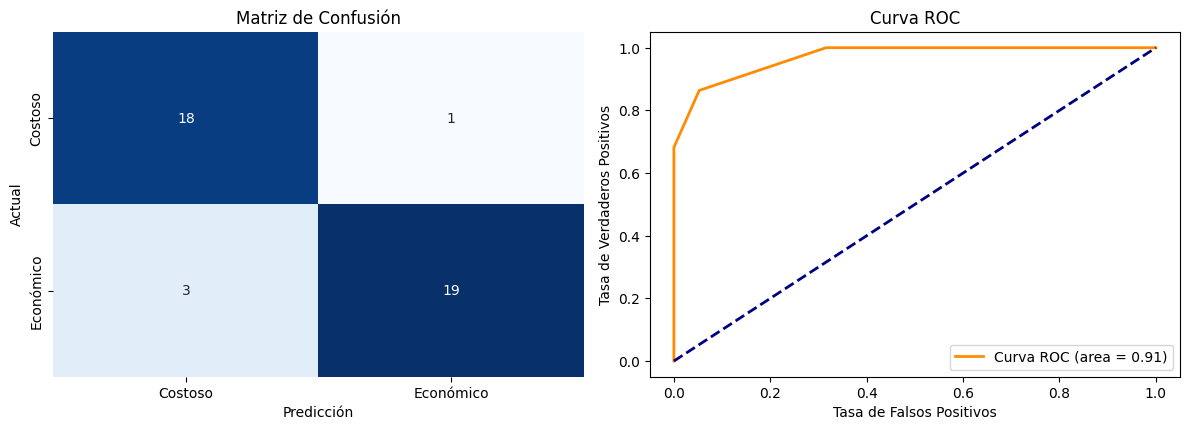

In [19]:
metrics_decision_tree = entrenamiento_evaluacion_modelo("DecisionTree", X, y, cv=5)

#### Bosque Aleatorio

Buscando las mejores características para RandomForest...
Características seleccionadas (33): wheel_base, car_length, car_width, curb_weight, engine_size, bore_ratio, stroke, compression_ratio, horse_power, peak_rpm, city_mpg, highway_mpg, symboling, door_number, cylinder_number, fuel_type_gas, car_body_hatchback, car_body_sedan, car_body_wagon, engine_location_rear, drive_wheel_fwd, drive_wheel_rwd, engine_type_dohcv, engine_type_ohc, engine_type_ohcf, engine_type_ohcv, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mfi, fuel_system_mpfi, fuel_system_spdi

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 100}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.920 
Precisión: 0.894
Sensibilidad: 0.951
Especificidad: 0.889
AUC: 0.982
Tiempo de ejecución 60.736s

Métricas de los datos d

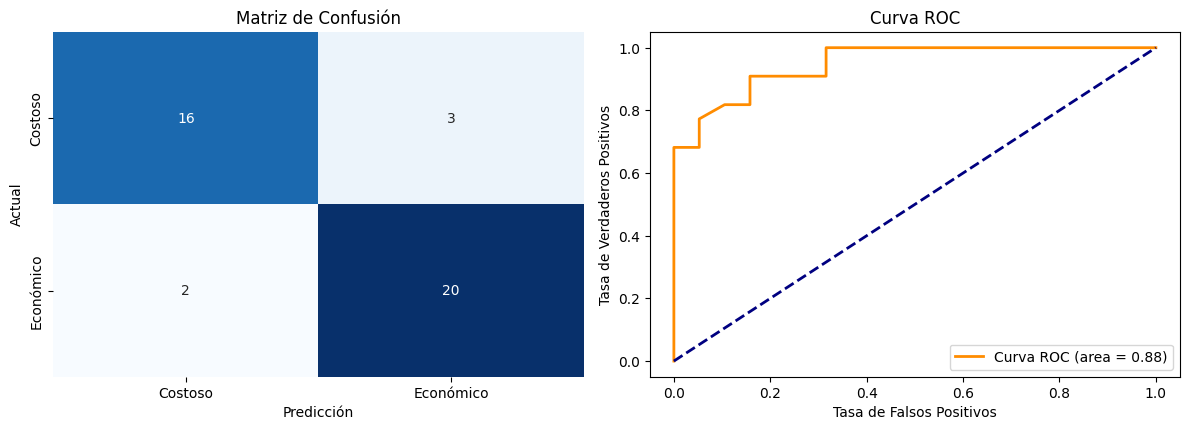

In [24]:
metrics_random_forest=entrenamiento_evaluacion_modelo("RandomForest", X, y, cv=5)

##### Regresión logística

Buscando las mejores características para LogisticRegression...
Características seleccionadas (15): wheel_base, curb_weight, horse_power, highway_mpg, door_number, car_body_hatchback, car_body_sedan, engine_type_ohcf, engine_type_rotor, fuel_system_2bbl, fuel_system_4bbl, fuel_system_idi, fuel_system_mpfi, fuel_system_spdi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'C': 0.01, 'max_iter': 1, 'penalty': 'l2', 'solver': 'saga'}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.896 
Precisión: 0.918
Sensibilidad: 0.876
Especificidad: 0.927
AUC: 0.980
Tiempo de ejecución 19.000s

Métricas de los datos de pruebas:
Exactitud: 0.829
Precisión: 0.800
Sendibilidad: 0.909
Especificidad: 0.737
AUC: 0.823


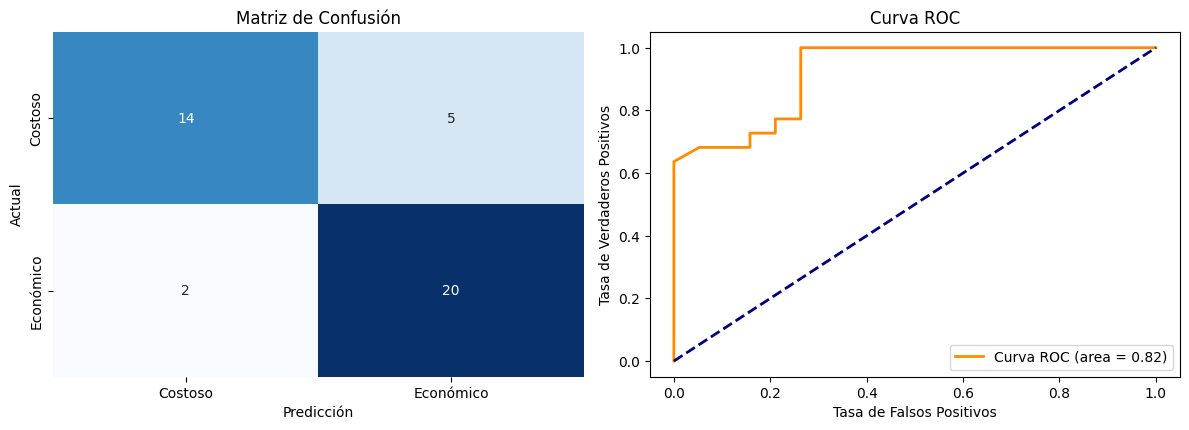

In [35]:
metrics_logistic_regression=entrenamiento_evaluacion_modelo("LogisticRegression", X, y, cv=5)


##### Máquina de vectores de soporte

Buscando las mejores características para SVM...
Características seleccionadas (15): wheel_base, engine_size, bore_ratio, stroke, horse_power, city_mpg, highway_mpg, symboling, cylinder_number, drive_wheel_rwd, engine_type_ohcf, fuel_system_2bbl, fuel_system_idi, fuel_system_mpfi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'C': 0.1, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.921 
Precisión: 0.879
Sensibilidad: 0.985
Especificidad: 0.844
AUC: 0.982
Tiempo de ejecución 20.519s

Métricas de los datos de pruebas:
Exactitud: 0.780
Precisión: 0.741
Sendibilidad: 0.909
Especificidad: 0.632
AUC: 0.770


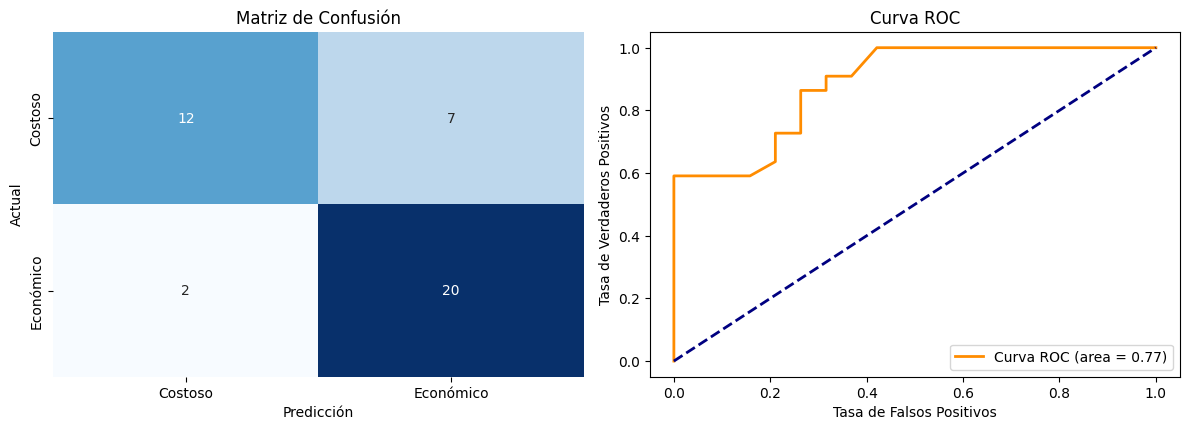

In [51]:
metrics_svm=entrenamiento_evaluacion_modelo("SVM", X, y, cv=5)


#### K vecinos más cercanos

Buscando las mejores características para KNeighbors...
Características seleccionadas (16): wheel_base, curb_weight, bore_ratio, stroke, city_mpg, highway_mpg, symboling, aspiration_turbo, car_body_hatchback, car_body_sedan, car_body_wagon, engine_type_ohcf, fuel_system_2bbl, fuel_system_4bbl, fuel_system_mpfi, fuel_system_spdi

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'algorithm': 'auto', 'n_neighbors': 20, 'p': 2, 'weights': 'distance'}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.921 
Precisión: 0.905
Sensibilidad: 0.940
Especificidad: 0.902
AUC: 0.974
Tiempo de ejecución 14.440s

Métricas de los datos de pruebas:
Exactitud: 0.805
Precisión: 0.792
Sendibilidad: 0.864
Especificidad: 0.737
AUC: 0.800


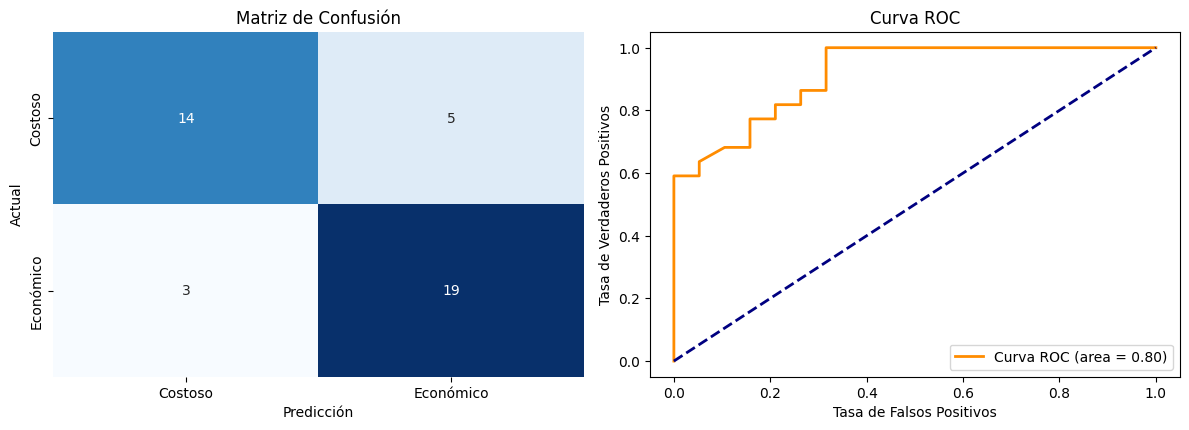

In [15]:
metrics_kneighbors=entrenamiento_evaluacion_modelo("KNeighbors", X, y, cv=5)

##### Naive Bayes

Buscando las mejores características para NaiveBayes...
Características seleccionadas (20): wheel_base, car_length, car_width, curb_weight, engine_size, bore_ratio, horse_power, city_mpg, highway_mpg, symboling, fuel_type_gas, aspiration_turbo, car_body_hatchback, drive_wheel_fwd, drive_wheel_rwd, engine_type_ohc, fuel_system_2bbl, fuel_system_idi, fuel_system_mpfi, fuel_system_spfi

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.927 
Precisión: 0.929
Sensibilidad: 0.929
Especificidad: 0.924
AUC: 0.972
Tiempo de ejecución 11.855s

Métricas de los datos de pruebas:
Exactitud: 0.854
Precisión: 0.833
Sendibilidad: 0.909
Especificidad: 0.789
AUC: 0.849


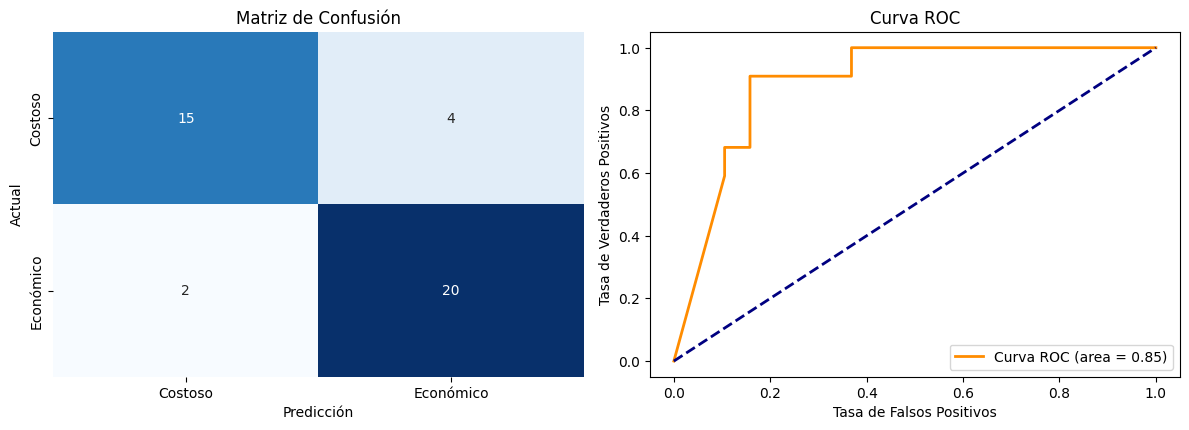

In [45]:
metrics_naives_bayes=entrenamiento_evaluacion_modelo("NaiveBayes", X, y, cv=5)

##### Potenciación del gradiente

Buscando las mejores características para GradientBoosting...
Características seleccionadas (5): car_width, stroke, compression_ratio, highway_mpg, fuel_system_2bbl

Información sobre el modelo seleccionado:
Mejores hiperparámetros: {'learning_rate': 1, 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 1.0}

Resultados validación cruzada de los datos de entrenamiento:
Exactitud: 0.927 
Precisión: 0.904
Sensibilidad: 0.952
Especificidad: 0.905
AUC: 0.990
Tiempo de ejecución 185.359s

Métricas de los datos de pruebas:
Exactitud: 0.878
Precisión: 0.870
Sendibilidad: 0.909
Especificidad: 0.842
AUC: 0.876


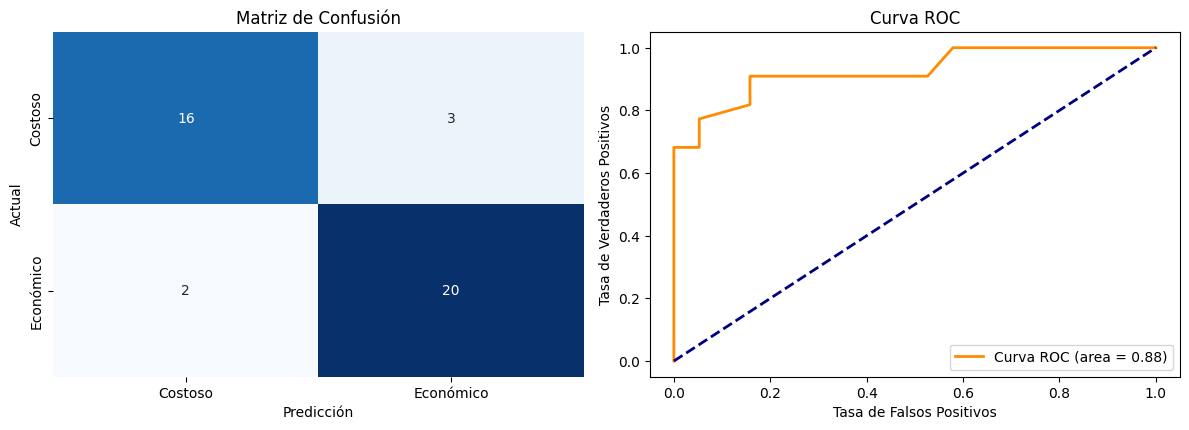

In [56]:
metrics_gradient_boosting=entrenamiento_evaluacion_modelo("GradientBoosting", X, y, cv=5)


## Resultados

A continuación, se presenta una tabla comparativa con los resultados obtenidos de los modelos de clasificación utilizados en el proyecto. Esta tabla resume las métricas clave que evalúan el rendimiento de cada modelo en la tarea de clasificación de automóviles en categorías de costos.


Las métricas incluidas son:
- **Exactitud (Accuracy):** Proporción total de predicciones correctas.
- **Precisión (Precision):** Proporción de instancias positivas identificadas correctamente.
- **Sensibilidad (Recall):** Proporción de instancias positivas identificadas correctamente respecto al total de instancias positivas reales.
- **Especificidad (Specificity):** Proporción de instancias negativas identificadas correctamente respecto al total de instancias negativas reales.
- **Área bajo la Curva (AUC):** Área bajo la curva ROC, proporcionando una métrica global del rendimiento del modelo en la clasificación binaria.
- **Tiempo de Ejecución:** El tiempo requerido para entrenar y evaluar cada modelo.




In [57]:
final_results = pd.concat([metrics_decision_tree, metrics_random_forest, metrics_logistic_regression,
                           metrics_svm, metrics_kneighbors, metrics_naives_bayes, metrics_gradient_boosting], ignore_index=True)

# Obtener las columnas numéricas para aplicar el estilo solo a ellas
numeric_columns = final_results.select_dtypes(include=[float]).columns

# Aplicar formato en negrita solo a las columnas numéricas
styled_final_results = final_results.style.apply(lambda col: ['font-weight: bold' if val == col.max() else '' for val in col], axis=0, subset=numeric_columns)

# Mostrar el dataframe estilizado con la columna 'Modelo' concatenada
styled_final_results



,Modelo,Exactitud,Precisión,Sensibilidad,AUC,Tiempo de Ejecución (s)
0,DecisionTree,0.926705,0.937043,0.914118,0.975242,20.967000
1,RandomForest,0.920455,0.894474,0.951063,0.982288,60.736000
2,LogisticRegression,0.896402,0.918437,0.875960,0.980126,19.000000
3,SVM,0.920833,0.878747,0.984615,0.982498,20.519000
4,KNeighbors,0.920833,0.904645,0.939703,0.974136,14.440000
5,NaiveBayes,0.926894,0.929060,0.928592,0.971853,11.855000
6,GradientBoosting,0.926515,0.904225,0.952452,0.989821,185.359000


En la tabla, se destacan en **negritas** los valores más altos de cada métrica. Considerando que nuestro dataset está balanceado, la exactitud es un buen indicador del desempeño del modelo. Notamos que, en el conjunto de entrenamiento, el modelo de Naive Bayes lidera con la mayor exactitud. No obstante, al evaluar los conjuntos de pruebas, el Árbol de Decisión logra la exactitud más alta. Aunque en el conjunto de entrenamiento ocupa el segundo lugar en la métrica de exactitud, para este conjunto de datos específico, el modelo más adecuado resulta ser el Árbol de Decisión.
